# Redondeo

**[1]**

(i) Usando el tipo `MiFloat`, ¿qué obtienes si sumas el número más grande posible consigo mismo? Para cualquier ejemplo, considera la base 2 con `prec=3`, `rmin=-1`, `rmax=2`.

(ii) ¿Cómo se te ocurre representar el resultado?

(iii) Y si sumas el número más grande con cualquier otro distinto de cero, ¿qué se obtiene?

**[1]**

(i) Usando el tipo `MiFloat`, ¿qué obtienes si sumas el número más grande posible consigo mismo? Para cualquier ejemplo, considera la base 2 con `prec=3`, `rmin=-1`, `rmax=2`.

Para ello implementemos el constructor `MiFloat`

In [1]:
const prec = 3
const rmin = -1
const rmax = 2

2

In [2]:
struct MiFloat 
    base ::Int
    sigma ::Bool
    expo ::Int
    mant ::NTuple{prec, Int}
    function MiFloat(base,sigma,expo,mant)
        @assert base >= 2 "Base tiene que ser mayor igual que dos" 
        for i in mant
            @assert i < base "Los elementos de la mantisa deben ser menores que la base"
        end
        @assert rmin <= expo  <= rmax "expo fuera de rango"
        
        new(base, sigma, expo, mant)
    end
end

In [3]:
function superFloat(x::MiFloat)
    if x.sigma 
        signo = -1
    else
        signo = 1
    end
    f = 0.0
    for i in 1:length(x.mant)
        f += (x.mant[i]/convert(Float64, x.base^(i-1)))*
        convert(Float64,x.base)^x.expo
    end
    f*signo
end

superFloat (generic function with 1 method)

Ahora sumemos el número más grande consigo mismo

In [4]:
function generadordemantisa(b,p)
    tupla = []
    for i in 0:1 ## prec
        for j in 0:1 ## base
            for k in 0:1
                push!(tupla,(i,j,k))
            end
        end
    end
    tupla
end

generadordemantisa (generic function with 1 method)

In [5]:
F = []
for  j in rmin:rmax, i in false:true
    mantisas = generadordemantisa(2,3)
    for mantisa in mantisas
        y = superFloat(MiFloat(2,i,j,mantisa)) 
        push!(F,y)
    end
        
end

In [6]:
for i in F 
    println(i)
end

0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
-0.0
-0.125
-0.25
-0.375
-0.5
-0.625
-0.75
-0.875
0.0
0.25
0.5
0.75
1.0
1.25
1.5
1.75
-0.0
-0.25
-0.5
-0.75
-1.0
-1.25
-1.5
-1.75
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
-0.0
-0.5
-1.0
-1.5
-2.0
-2.5
-3.0
-3.5
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
-0.0
-1.0
-2.0
-3.0
-4.0
-5.0
-6.0
-7.0


In [7]:
using Plots, LaTeXStrings

In [8]:
y = zeros(length(F))

64-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0


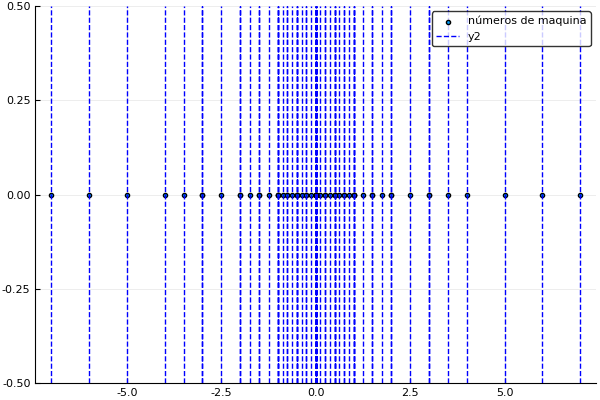

In [9]:
scatter(F, y, ms=3.0, lab="números de maquina",ylim=(-0.5,0.5))
vline!(F,line=(1,:dash),color=[:blue :orange])

Vemos que número más grande es el $7.0$, es decir;

In [22]:
x =  superFloat(MiFloat(2,false,2,(1,1,1)))

7.0

In [13]:
x + x 

14.0

Vemos que sumar `x` consigo mismo sale de la aritmetica definida

(ii) ¿Cómo se te ocurre representar el resultado?



(iii) Y si sumas el número más grande con cualquier otro distinto de cero, ¿qué se obtiene?

Para ver los anterior generemos otro número 

In [14]:
y = superFloat(MiFloat(2,true,1,(1,0,1)))

-2.5

In [15]:
s = x + y

4.5

Vemos que $4.5$ no forma parte de los números generados

In [16]:
for i in F
    if i == 4.5
        return println("Lo encontre")
    end
end

**[2]** Sobrecarga la función `show` (que existe en `Base`) para representa de manera agradable los números tipo `MiFloat`.

Sobrecarguemos dicha función

In [17]:
function Base.show(io::IO, m::MiFloat) 
    base = m.base
    sigma = (-1)^Int(m.sigma)
    expo = m.expo
    mantisa = m.mant
    println(io, "$sigma $mantisa × $base^$expo")
end

In [19]:
MiFloat(2,false,2,(1,1,1))

1 (1, 1, 1) × 2^2


In [21]:
MiFloat(2, true, 1, (1, 0, 1))

-1 (1, 0, 1) × 2^1


Es fácil convencerse que la suma no es cerrada para los números de punto flotante. Considerando por concretez la base 2 con `prec=3`, `rmin=-1`, `rmax=2` para definir `MiFloat`, y por simplicidad sólo considerando los números de punto flotante normales, el resultado de 

    MiFloat(2, false, -1, (1, 0, 0)) + Mifloat(2, false, -1, (1, 0, 1))
    
no es un número que puede representarse por `MiFloat`. Justamente esto nos lleva al concepto de *redondeo*.

In [47]:
MiFloat(2, false, -1, (1, 0, 0)) + MiFloat(2, false, -1, (1, 0, 1))

LoadError: [91mMethodError: no method matching +(::MiFloat, ::MiFloat)[0m
Closest candidates are:
  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:424
  +([91m::PyCall.PyObject[39m, ::Any) at /Users/porras/.julia/v0.6/PyCall/src/pyoperators.jl:11[39m

In [51]:
MiFloat(2, false, -1, (1, 0, 0)) 

1 (1, 0, 0) × 2^-1


ERROR (unhandled task failure): InterruptException:
Stacktrace:
 [1] process_events at ./libuv.jl:82 [inlined]
 [2] wait() at ./event.jl:216
 [3] wait(::Condition) at ./event.jl:27
 [4] stream_wait(::Timer, ::Condition, ::Vararg{Condition,N} where N) at ./stream.jl:42
 [5] wait(::Timer) at ./event.jl:357
 [6] (::Base.##300#301{IJulia.#send_stderr,Timer})() at ./event.jl:430


## Redondeo

Sea $\mathbb{R}^*$ los **reales extendidos**, o sea, que incluyen a $-\infty$ e $\infty$, y $\mathbb{F}^*$ los números de punto flotante extendidos.

Una operación $\bigcirc: \mathbb{R}^* \to \mathbb{F}$ es una operación de **redondeo** si se cumplen las siguientes dos propiedades:

- (1) $x\in\mathbb{F}^* \Longrightarrow \bigcirc(x) = x$,

- (2) $x, y\in\mathbb{F}^*$ y $x\le y \Longrightarrow \bigcirc(x) \le \bigcirc(y)$.

Hay diversos tipos de redondeo. En particular nos interesarán los llamados *modos directos* de redondeo. 

Definiremos el redondeo *hacia abajo* (o hacia menos infinito) y el redondeo *hacia arriba* (o hacia más infinito), que denotaremos respectivamente con los símbolos $\triangledown$ y $\vartriangle$, si además se cumple:

- $x\in\mathbb{R}^* \Longrightarrow \triangledown(x) \leq x$,

- $x\in\mathbb{R}^* \Longrightarrow \, \vartriangle(x) \geq x$.

De esta manera, si $x\in\mathbb{R}^*$, el número $\triangledown(x)$ es el mayor número de punto flotante menor o igual a x, y $\vartriangle(x)$ es el menor número de punto flotante mayor o igual a x.

**[3]** ¿Qué podemos decir de $\vartriangle(-x)$ y $\triangledown(x)$ ?

* $\vartriangle(-x)$  el menor número de punto flotante mayor o igual a $-x$
* $\triangledown(x)$ es el mayor número de punto flotante menor o igual a x

Otro modo de redondeo ampliamente usado es el llamado *redondeo al más cercano*. La idea es que para todo valor $x$ (menor en valor absoluto al mayor número representable, $N_\textrm{max}$), se cumple

$$ \triangledown(x) \leq x \leq \,\vartriangle(x). $$

Definiendo el punto medio $\mu(x) = \frac{1}{2}(\triangledown(x)+\vartriangle(x)\,),$ definimos para $x > 0$ el modo de redondeo *al más cercano* como

\begin{eqnarray*}
\square_n(x) & = & \triangledown(x), \textrm{si } x\in [\triangledown(x),\mu),\\
\square_n(x) & = & \vartriangle(x), \textrm{si } x\in[\mu,\vartriangle(x)],\\
\end{eqnarray*}

Para $x<0$, usamos la propiedad $\square_n(x)= -\square_n(-x)$.

En la definición anterior hay una pequeña asimetría que, de hecho, hace que se redondee más hacia arriba o hacia abajo, según el signo de $x$.

Para evitar eso, en particular respecto al caso en que $x=\mu$, se introduce el redondeo *hacia el más cercano par*, explotando el último dígito de la expansión en la base $\beta$. Escribimos:

\begin{eqnarray}
\triangledown(x) &\longrightarrow& (a_0.a_1\dots a_{p-1})_\beta,\\
\vartriangle(x) &\longrightarrow& (b_0.b_1\dots b_{p-1})_\beta.
\end{eqnarray}

Si $x\not\in \mathbb{F}^*$ sólo uno de los dos últimos bits de la representación de la mantisa de $\triangledown(x)$ o $\vartriangle(x)$ es par. Así, definimos el modo de redondeo $\square(x)$ *hacia el más cercano par* como ($x>0$):

\begin{eqnarray*}
\square(x) & = & \triangledown(x), \textrm{si } x\in [\triangledown(x),\mu), \textrm{o si } x=\mu \textrm{ y } a_{p-1} \textrm{es par},\\
\square(x) & = & \vartriangle(x), \textrm{si } x\in(\mu,\vartriangle(x)], \textrm{o si } x=\mu \textrm{ y } b_{p-1} \textrm{es par}.
\end{eqnarray*}

El modo de redondeo $\square$ es típicamente el modo que se utiliza por default en casi todas las implementaciones de los números de punto flotante.

Es importante enfatizar que $\mu$ es un número real, en general no representable como `Float64` (o `MiFloat`). Es por esto que, a fin de poder decidir cómo redondear, se requieren un par de bits más para $\mu$.

**[4]** 

Sobrecarga la operación suma (`+`), definida en `Base`, para que funcione usando dos elementos de `MiFloat`, de tal forma que el usuario pueda elegir qué tipo de redondeo quiere. Incluye varios tests que demuestren el funcionamiento de tu algoritmo.

Para hacer esto, una posibilidad es definir una constante `ModoRedondeo` que pueda valer `:RedondArriba`, `:RedondAbajo` o `:RedondMasCercano`. (Nota los "dos puntos" `:`; sirven para especificar que estas palabras son símbolos.) La idea es definir apropiadamente las funciones `suma(::Val{:RedondArriba}, a::MiFloat, b::MiFloat)`, `suma(::Val{:RedondAbajo}, a::MiFloat, b::MiFloat)`, `suma(::Val{:RedonddMasCercano}, a::MiFloat, b::MiFloat)`, para sobrecargar la operación `+` llamando a `suma(Val(ModoRedondeo), a, b)`.

In [48]:
import Base: +

In [50]:
ModoRedondeo:RedondArriba

LoadError: [91mUndefVarError: ModoRedondeo not defined[39m

In [ ]:
function suma(::Val{:RedondArriba}, a::MiFloat, b::MiFloat)
    return 
end

In [ ]:
function +(x::Intervalo, y::Intervalo)
    return Intervalo(x.inf + y.inf, x.sup + y.sup)
end

**[5]** Escribe una función que permita convertir de `Float64` a `MiFloat`, respetando el modo de redondeo especificado en `ModoRedondeo`.

**[6]** ¿Cómo se te ocurre verificar que `:RedondMasCercano` ($\square$) no tiene sesgo?

**[7]** 

(i) ¿Cómo usarías alguno o algunos modos de redondeo para definir intervalos que garanticen que el punto que estamos buscando esté en el intervalo?

(ii) ¿Cuál sería un intervalo apropiado que contiene al número real `0.1`, usando `Float64`? 

**[4]** 

Sobrecarga la operación suma (`+`), definida en `Base`, para que funcione usando dos elementos de `Mifloat`, de tal forma que el usuario pueda elegir qué tipo de redondeo quiere. Incluye varios tests que demuestren el funcionamiento de tu algoritmo.

Para hacer esto, una posibilidad es definir una constante `ModoRedondeo` que pueda valer `:RedondArriba`, `:RedondAbajo` o `:RedondMasCercano`. (Nota los "dos puntos" `:`; sirven para especificar que estas palabras son símbolos.) La idea es definir apropiadamente las funciones `suma(::Val{:RedondArriba}, a::Mifloat, b::MiFloat)`, `suma(::Val{:RedondAbajo}, a::MiFloat, b::MiFloat)`, `suma(::Val{:RedonddMasCercano}, a::MiFloat, b::MiFloat)`, para sobrecargar la operación `+` llamando a `suma(Val(ModoRedondeo), a, b)`.

**[5]** Escribe una función que permita convertir de `Float64` a `MiFloat`, respetando el modo de redondeo especificado en `ModoRedondeo`.

**[6]** ¿Cómo se te ocurre verificar que `:RedondMasCercano` ($\square$) no tiene sesgo?

**[7]** 

¿Cómo usarías alguno o varios modos de redondeo para definir intervalos que garantizen que el punto $x$ que estamos buscando esté contenido en un intervalo?

¿Cuál sería un intervalo apropiado que contiene al número real `0.1`, usando `Float64`? 

# Errores por el redondeo

**Teorema** Si $x$ es un número real en el rango normalizado de $\mathbb{F}_{\beta,p}$, entonces el error relativo causado por el redondeo está acotado:

\begin{equation}
\Big|\frac{x-\bigcirc(x)}{x} \Big| < \varepsilon_M = \beta^{p-1}.
\end{equation}

El error absoluto correspondiente está acotado por $|x|\,\varepsilon_M$.

(El número $\varepsilon_M$ se llama "el epsilon de la máquina".)

**[8]** 

(i) Ejemplifica el teorema anterior con tu implementación de los distintos modos del redondeo. 

(ii) Muestra con un par de ejemplos que en el caso de $\square(x)$, la cota puede reducirse por un factor 0.5.

(iii) Muestra que el espaciamiento de dos números de punto flotante consecutivos $x$ y $y$ en el rango normalizado está acotado entre
$|x|\,\varepsilon_M/\beta$ y $|x|\,\varepsilon_M$.

(iv) ¿Cómo se comportan los errores relativos en el rango de los números subnormales? Muestra tu argumentación con un par de ejemplos.

**[9]** Definiremos $x\oplus y=\bigcirc(x+y)$, esto es, la suma en la aritmética en $\mathbb{F}^*$. 

(i) Muestra que el error relativo (respecto al resultado exacto) de una operación (la suma, en este caso) está acotado por $\varepsilon_M$.

(ii) ¿Se cumple esto si consideramos dos o más sumas? Ilustra tu argumento con algún ejemplo.

**[10]** Considera el mapeo $f(x) = 3x \textrm{ mod } 1$, con $f:[0,1]\to[0,1]$.

(i) Muestra analíticamente que $x_0= 1/10$ pertenece a un ciclo de periodo 4 de este mapeo.

(ii) ¿Puedes mostrar numéricamente (usando `Float64`) este resultado? ¿Qué ocurre si utilizas `BigFloat` y `Rational{Int}`? (Es útil leer la ayuda de la función `mod`.)

# Resumen

**[11]** Escribe un resumen de lo aprendido en este notebook.